In [45]:
#pandas,matplotlib,seabornをimportします。
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#csvファイルを読み込みます。
df = pd.read_csv("/content/drive/MyDrive/世界幸福度データ分析/archive (2)/2019.csv")

In [47]:
#読み込んだファイルの概要を確認します。
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


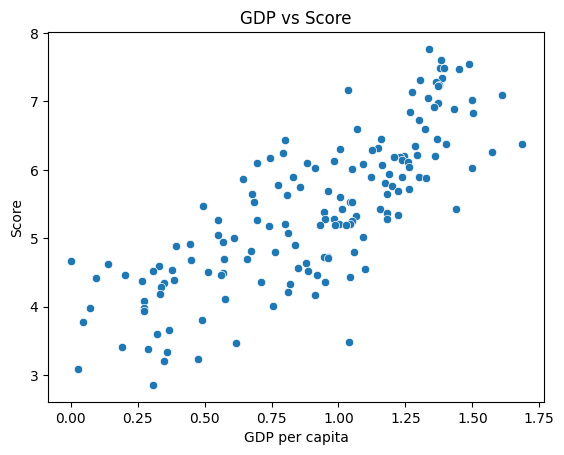

In [48]:
#1人当たりのGDPと幸福度の散布図を図示します。
sns.scatterplot(data = df,x="GDP per capita",y="Score")
plt.title("GDP vs Score")
plt.savefig("fig1.png", dpi=150)
plt.show()

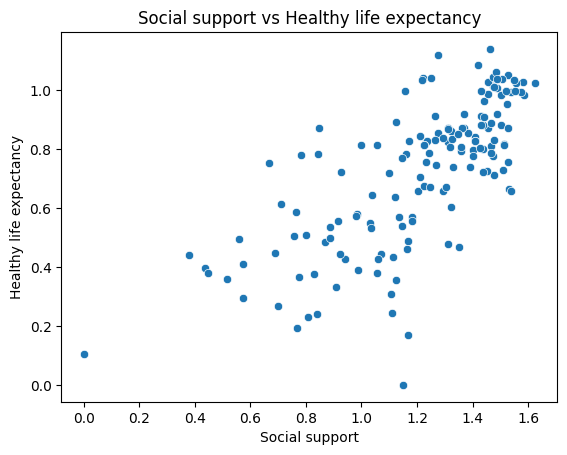

In [49]:
#社会福祉と健康寿命の散布図を図示します。
sns.scatterplot(data = df,x="Social support",y="Healthy life expectancy")
plt.title("Social support vs Healthy life expectancy")
plt.savefig("fig2.png", dpi=150)
plt.show()

In [50]:
#国名とランキングを除きます。
df = df.drop(["Country or region","Overall rank"],axis=1)

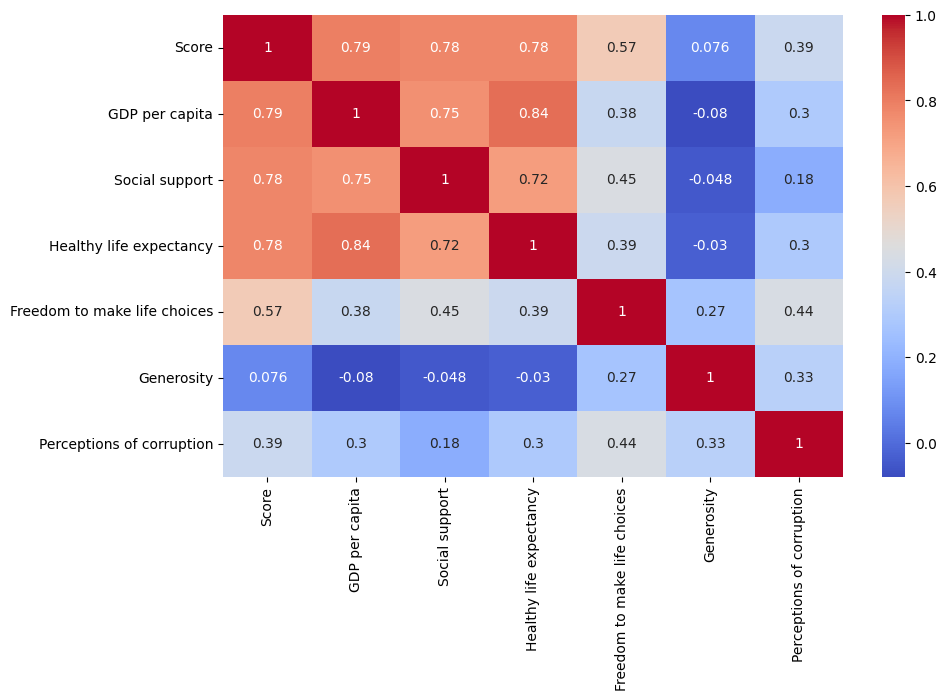

In [51]:
#そのほかの相関を確認するためにヒートマップを作成します。
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.savefig("fig3.png", dpi=150)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
y = df["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2:", r2_score(y_test, y_pred))

R^2: 0.6017537913445683


In [53]:
coef = pd.DataFrame({"特徴量": X.columns, "係数": model.coef_})
coef.sort_values("係数", ascending=False)

,特徴量,係数
3,Freedom to make life choices,1.489813
1,Social support,1.232325
5,Perceptions of corruption,1.112431
2,Healthy life expectancy,0.930945
0,GDP per capita,0.750717
4,Generosity,0.270378


# 🧠 世界幸福度データを用いた幸福度の要因分析
---

## 🎯 「GDPが高い国は本当に幸福なのか？」
経済的要因と社会的要因が幸福度にどのような影響を与えているのかを検証する。

---

## 💡 仮説（Hypothesis）
- 「GDPが高い国ほど幸福度が高いのでは？」
- 「自由度が高いほど幸福度も上がるのでは？」

---

## 🧮 データ理解（Data Understanding）
- データ名：World Happiness Report（Kaggleより取得）
- 年：2019年版

| カラム名 | 意味 |
|-----------|------|
| GDP per capita | 1人当たりのGDP |
| Social support | 社会福祉 |
| Healthy life expectancy | 健康寿命 |
| Freedom to make life choices | 人生の選択の自由 |
| Generosity | 寛大さ |
| Perceptions of corruption | 汚職の実感 |
| Score | 幸福度 |
---
## 🧹 データ前処理（Data Cleaning）
- 国名の削除
- ランキングの削除
---
## 📊 分析と可視化（Analysis & Visualization）
- 1人当たりのGDPと幸福度の散布図
- 社会福祉と健康寿命の散布図
- 全体のヒートマップ
---
## 🧭 結果と考察（Results & Insights）
- 幸福度と関係があったのは、1人当たりのGDP、社会福祉、健康寿命であった。
- 寛大さや人生の選択の自由は幸福度とあまり関係はなかった。
- 社会福祉と健康寿命にも関係が見られた。
---
## 🚀 まとめ（Conclusion）


* 幸福度と関係が強かったのは、1人当たりのGDP、社会福祉、健康寿命の３つであった。
* 社会福祉と健康寿命の間にも関係があるようなので、社会福祉を整えることが最優先である可能性が高い。
---
## 🧰 使用ライブラリ
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



